# 군집분석 실습 p.332

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

### 1. 데이터 불러오기

In [135]:
ds_iris = pd.read_csv("실습파일/IRIS.csv", engine = 'python')
ds_iris_x = ds_iris.drop("SPECIES", axis =1)
ds_iris_y = ds_iris["SPECIES"]
ds_iris_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
scaler = StandardScaler()
ds_iris_scaled = scaler.fit_transform(ds_iris_x)
ds_iris_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
ds_iris_y = ds_iris_scaled[:,0]
ds_iris_x = ds_iris_scaled[:, 1::]

### 2. 계층적 군집 분석

Text(0, 0.5, 'sample index')

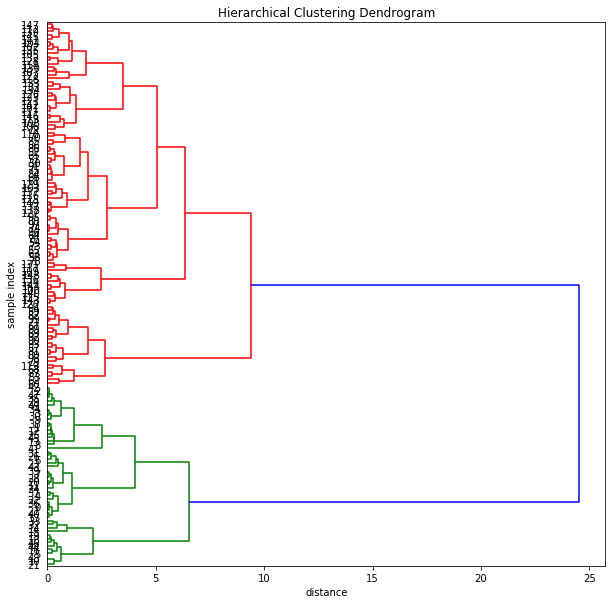

In [11]:
z_ward = linkage(ds_iris_x, method="ward", metric = "euclidean")

z_average = linkage(ds_iris_x, method="average", metric = "euclidean")

z_minkowski = linkage(ds_iris_x, method="average", metric = "minkowski")

plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(z_ward, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

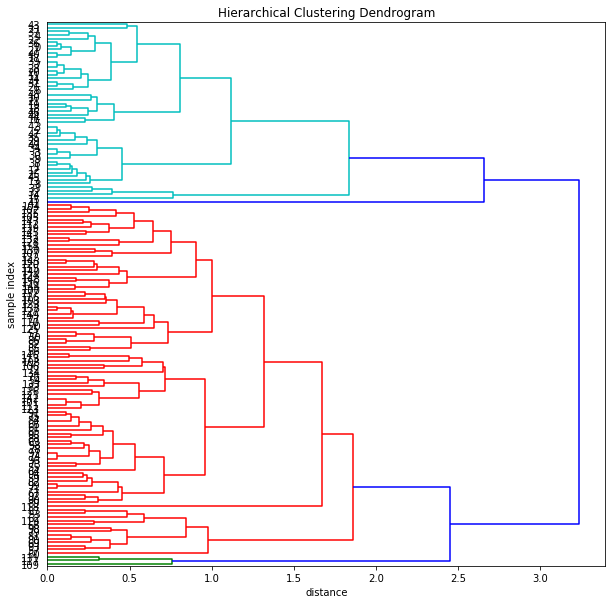

In [12]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(z_average, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

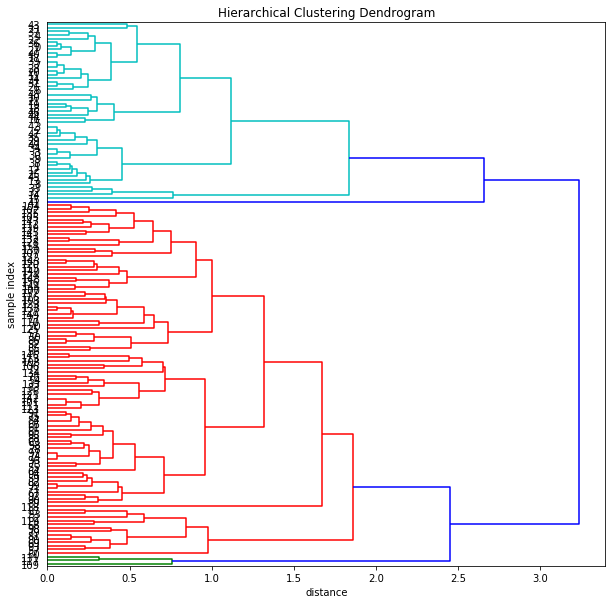

In [13]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(z_minkowski, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [14]:
cluster_hierarchical = fcluster(Z= z_ward, t=5, criterion="distance")

ds_iris["ClusterHierarchical"] = cluster_hierarchical
ds_iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


In [15]:
ds_summary_hc =ds_iris.groupby("ClusterHierarchical").agg(["min", "mean", "max"])

level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)

ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.1,5.369,5.8,3.7,3.908,4.4,1.2,1.523,1.9,0.1,0.285,0.4
1,2,4.3,4.878,5.5,2.3,3.259,3.6,1.0,1.441,1.9,0.1,0.232,0.6
2,3,4.9,5.605,6.3,2.0,2.473,2.8,3.0,3.932,5.0,1.0,1.186,1.5
3,4,6.2,6.817,7.9,3.1,3.383,3.8,5.3,5.842,6.7,2.0,2.317,2.5
4,5,5.4,6.258,7.2,2.8,3.014,3.4,3.6,4.717,6.0,1.2,1.522,2.0
5,6,4.9,6.527,7.7,2.5,2.790,3.1,4.5,5.473,6.9,1.4,1.963,2.4


In [18]:
n_iter_cluster =15
cluster_range = [i +1 for i in range(n_iter_cluster)]
clus_error = []
for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(ds_iris_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error":clus_error})
ds_error.round(3)

,Error,NumberofCluster
0,450.000,1
1,149.564,2
2,95.319,3
3,74.244,4
4,57.123,5
5,46.018,6
6,39.389,7
7,33.966,8
8,29.584,9
9,26.407,10


Text(0, 0.5, 'Sum of squared distnace')

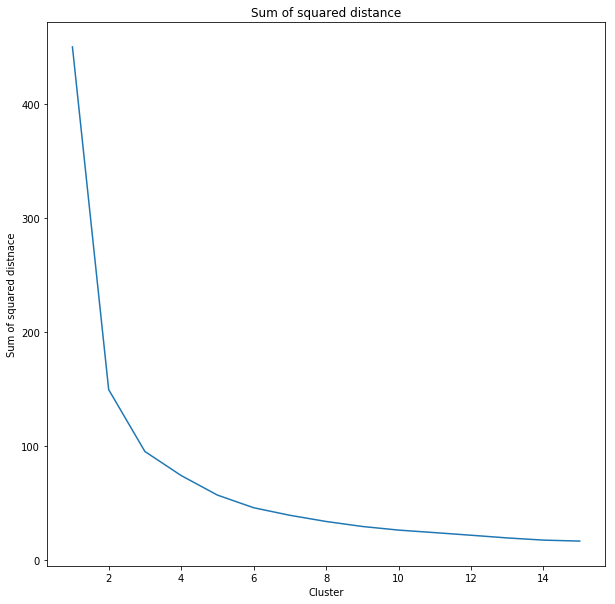

In [19]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Cluster")
plt.ylabel("Sum of squared distnace")

### 3. 비계층적 군집분석

In [21]:
clus = KMeans(3)
clus.fit(ds_iris_x)
cluster_kmeans = [i+1 for i in clus.labels_]
ds_iris["ClusterKmeans"] = cluster_kmeans
ds_iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans
0,5.1,3.5,1.4,0.2,setosa,2,2
1,4.9,3.0,1.4,0.2,setosa,2,2
2,4.7,3.2,1.3,0.2,setosa,2,2
3,4.6,3.1,1.5,0.2,setosa,2,2
4,5.0,3.6,1.4,0.2,setosa,2,2


In [22]:
ds_summary_km = ds_iris.drop("ClusterHierarchical", axis =1, inplace = False).groupby("ClusterKmeans").\
agg(['min', 'mean','max'])

level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.6,6.713,7.9,2.6,3.109,3.8,4.5,5.526,6.9,1.4,2.017,2.5
1,2,4.3,5.016,5.8,2.9,3.451,4.4,1.0,1.465,1.9,0.1,0.245,0.6
2,3,4.5,5.853,6.8,2.0,2.664,3.1,1.3,4.322,5.8,0.3,1.365,2.0


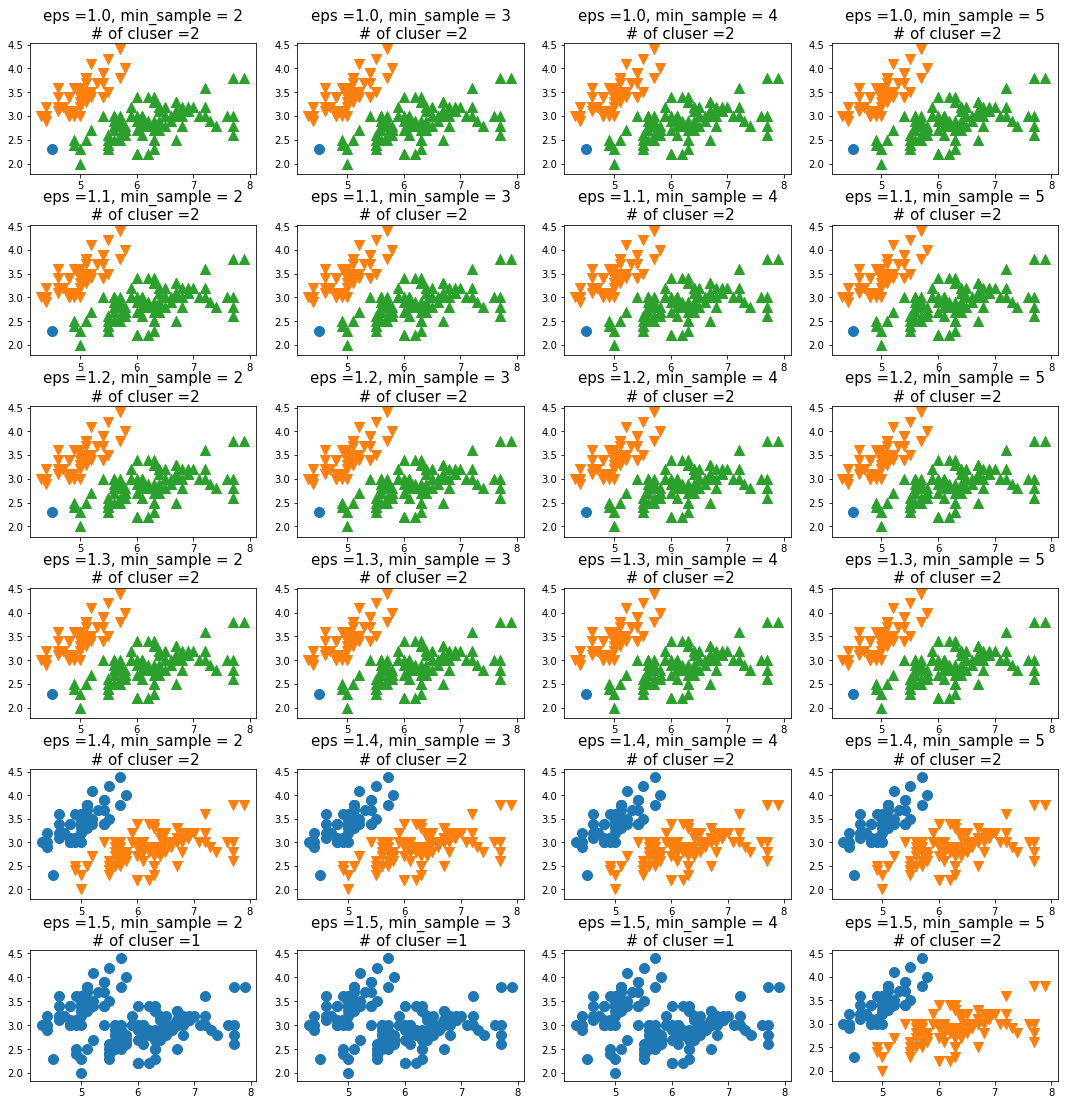

In [131]:
X = ds_iris["SEPAL_LENGTH"]
Y = ds_iris["SEPAL_WIDTH"]

markers = ["o", "v", "^", "s", "<", ">", "p", "D"]

para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15))
fig.tight_layout(w_pad = 1, h_pad = 3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        clusters = dbscan.fit_predict(ds_iris_x)
        clusters = clusters+1
        for(n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1,1)):
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s= 100)
            axes[i, j].set_title("eps ="+ str(eps)+", min_sample = "+ str(min_sample)+
                                "\n # of cluser =" +str(max(clusters)), fontsize = 15)

In [132]:
dbscan = DBSCAN(eps = 0.4, min_samples=5).fit(ds_iris_x)

cluster_dbscan = dbscan.labels_

for(i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] +1

ds_iris["ClusterDBSCAN"] = cluster_dbscan
ds_iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans,ClusterDBSCAN
0,5.1,3.5,1.4,0.2,setosa,2,2,1
1,4.9,3.0,1.4,0.2,setosa,2,2,1
2,4.7,3.2,1.3,0.2,setosa,2,2,1
3,4.6,3.1,1.5,0.2,setosa,2,2,1
4,5.0,3.6,1.4,0.2,setosa,2,2,1


In [133]:
ds_summary_db = ds_iris.drop(["ClusterHierarchical", "ClusterKmeans"],
                                  axis = 1,
                                  inplace = False).groupby("ClusterDBSCAN").agg(["min","mean","max"])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)

ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBSCAN,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,0,4.5,6.148,7.9,2.0,2.876,4.4,1.3,4.510,6.9,0.1,1.486,2.5
1,1,4.3,4.987,5.8,2.9,3.400,4.0,1.0,1.465,1.9,0.1,0.246,0.6
2,2,4.9,6.241,7.7,2.3,2.913,3.4,3.0,4.839,6.7,1.0,1.655,2.5


# 연관분석 실습 p.345

In [49]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### 1. 데이터 불러오기

In [77]:
ds_purch = pd.read_csv("실습파일/상품구매.csv", engine = 'python')
ds_purch.head()

,ID,PRODUCT
0,C-11,BAGUETTE
1,C-11,HERRING
2,C-11,AVOCADO
3,C-11,ARTICHOKE
4,C-11,HEINEKEN


In [88]:
data_list = list(map(list,ds_purch.groupby("ID").PRODUCT))

d_list = []
for i in range(len(data_list)):
    d_list.append(data_list[i][1])
    
d_list
# t_list = []
# for name, group in ds_purch.groupby("ID"):
#     t_list.append(group["PRODUCT"])
    
# t_list

[0       BAGUETTE
 1        HERRING
 2        AVOCADO
 3      ARTICHOKE
 4       HEINEKEN
 5         APPLES
 6    CORNED BEEF
 Name: PRODUCT, dtype: object, 7         HERRING
 8     CORNED BEEF
 9          APPLES
 10         OLIVES
 11          STEAK
 12       SARDINES
 13       HEINEKEN
 Name: PRODUCT, dtype: object, 14     BAGUETTE
 15     SARDINES
 16       APPLES
 17      PEPPERS
 18      AVOCADO
 19        STEAK
 20    ICE CREAM
 Name: PRODUCT, dtype: object, 21        HERRING
 22    CORNED BEEF
 23         OLIVES
 24            HAM
 25         TURKEY
 26           COKE
 27         APPLES
 Name: PRODUCT, dtype: object, 28       OLIVES
 29      BOURBON
 30         COKE
 31       TURKEY
 32    ICE CREAM
 33    ARTICHOKE
 34          HAM
 Name: PRODUCT, dtype: object, 35     BAGUETTE
 36      HERRING
 37      AVOCADO
 38    ARTICHOKE
 39     HEINEKEN
 40         COKE
 41       TURKEY
 Name: PRODUCT, dtype: object, 42       SARDINES
 43       HEINEKEN
 44        CHICKEN
 45           

### 2. 연관규칙 분석

In [89]:
enc = TransactionEncoder()
arr = enc.fit_transform(X= d_list)
ds_pre = pd.DataFrame(arr, columns=enc.columns_)
ds_pre.head()

,APPLES,ARTICHOKE,AVOCADO,BAGUETTE,BOURBON,CHICKEN,COKE,CORNED BEEF,CRACKERS,HAM,HEINEKEN,HERRING,ICE CREAM,OLIVES,PEPPERS,SARDINES,SODA,STEAK,TURKEY
0,True,True,True,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False
2,True,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False
3,True,False,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,True


In [90]:
ds_freq = apriori(ds_pre, min_support=0.5, use_colnames=True)
ds_freq.round(3)

,support,itemsets
0,0.55,(BOURBON)
1,0.50,(COKE)
2,0.60,(HEINEKEN)
3,0.65,(OLIVES)
4,0.50,"(OLIVES, BOURBON)"


In [91]:
ds_asso_rule = association_rules(ds_freq, metric="confidence", min_threshold=0.5)
ds_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OLIVES),(BOURBON),0.65,0.55,0.5,0.769,1.399,0.142,1.95
1,(BOURBON),(OLIVES),0.55,0.65,0.5,0.909,1.399,0.142,3.85


### 3. 결론 도출

- [(ORLIVES), (BOURBON)] Confidence = 0.769,
- [(BOURBON), (ORLIVES)] Confidence = 0.909,
-> BOURBON 을 구매한 고객은 ORLIVES을 구매할 가능성이 높다.

- [(ORLIVES), (BOURBON)], [(BOURBON), (ORLIVES)] Lift = 1.399,
-> 둘 중 하나를 구매한 사람에게 다른 하나를 추천!